In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
import scipy.stats as stats
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pickle
df =pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


### Checking Null values 

In [408]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [409]:
df.drop('Serial No.',axis=1,inplace=True)

In [410]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [414]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [415]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [416]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [417]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [418]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Since we have filled all null values now we can proceed with the visualization part to check which of the feature is forming gaussian distribution and which of the features forming linear relationship with Chance of Admit!

In [419]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

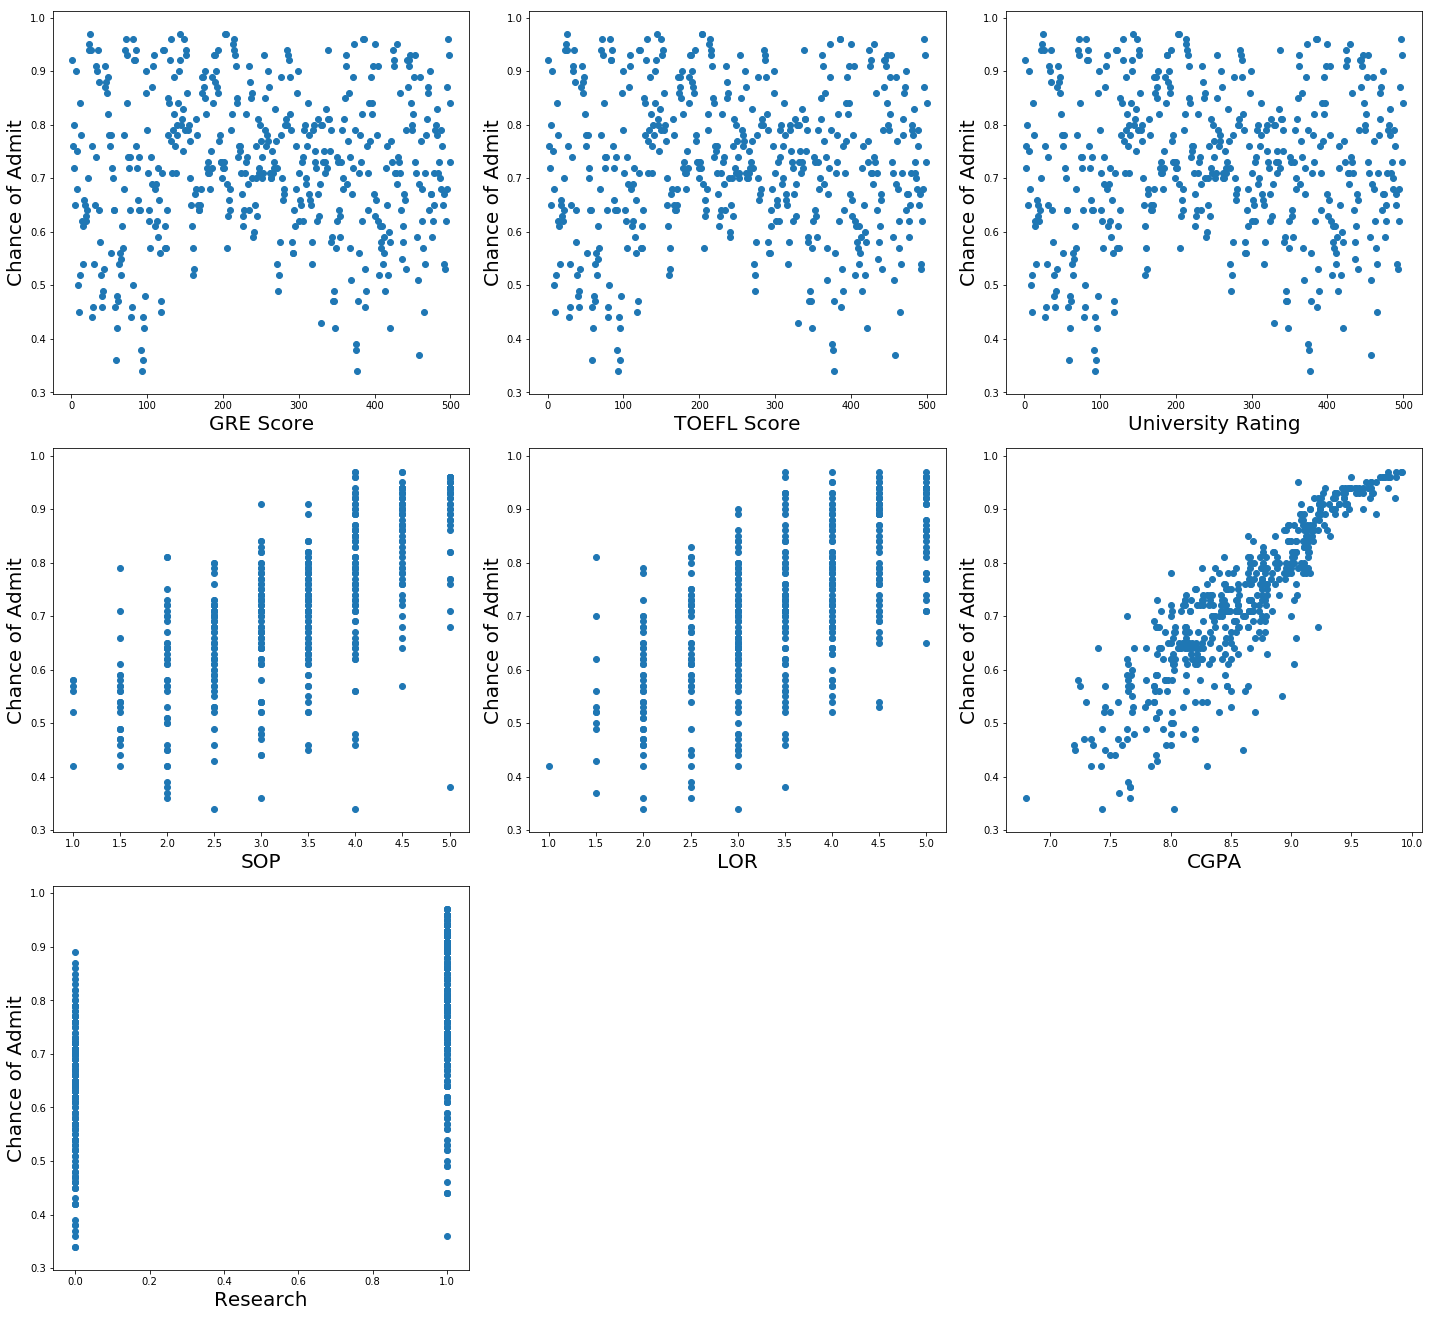

In [420]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

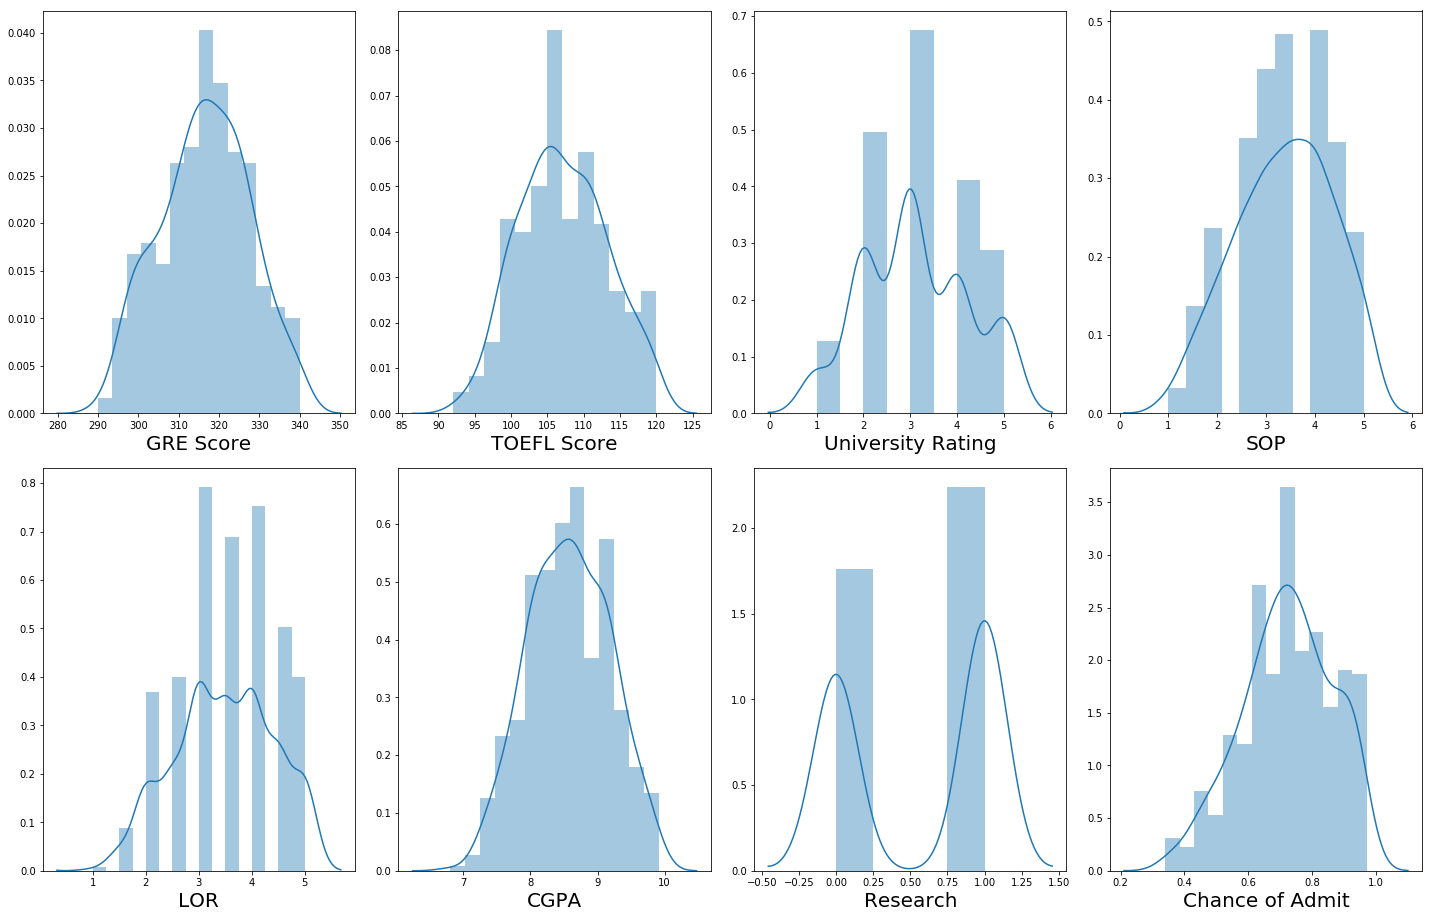

In [421]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Above visualization states that each of the features have gaussian distribution!

### Let's create our first Model!

####  First make all the feature standarization!

In [457]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)
X_scaled

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

### Check Multicollinearity 

In [468]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Above summary shows that there is no multicollinearity, since there values are less than 5.

In [430]:
from sklearn.linear_model import LinearRegression
#feature_cols = ['TV']
x = df.drop('Chance of Admit',axis=1)
y= df[['Chance of Admit']]

lm = LinearRegression()
lm.fit(x,y)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to [-1.26668999]
Coeffecient is equal to [[0.00176953 0.0027296  0.00512143 0.00221007 0.01662566 0.12125127
  0.02578198]]


In [431]:
def adjusted_r2(x,y):
    a = lm.score(x,y)
    N = df.shape[0]
    P = df.shape[1]
    return 1- ((1-a) * (N-1))/(N-P-1)
    

In [436]:
lm.score(x,y)

0.8206784936488388

In [437]:
adjusted_r2(x,y)

0.8177567583111417

### Adjustred R2 is 81.77% which means our model's accuracy is very high. Let's evaluate statistical approach of model ! 

In [438]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [439]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1).fit()
model.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          4.40e-179
Time:                        01:25:31   Log-Likelihood:                 699.68
No. Observations:                 500   AIC:                            -1383.
Df Residuals:                     492   BIC:                            -1350.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2667      0.104    -12.155      0.000      -1.471      -1.062
GRE Score             0.0018      0.000      3.578      0.000       0.001       0.003
TOEFL Score           0.0027      0.001      3.147      0.002       0.001       0.004
University Rating     0.0051      0.004      1.352      0.177      -0.002       0.013
SOP                   0.0022      0.005      0.488      0.626      -0.007       0.011
LOR                   0.0166      0.004      4.000      0.000       0.008       0.025
CGPA                  0.1213      0.010     12.615      0.000       0.102       0.140
Research              0.0258      0.007      3.935      0.000       0.013       0.039
==============================================================================
Omnibus:                      110.016   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.783
Skew:                          -1.147   Prob(JB):                     2.58e-54
Kurtosis:                       5.565   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [440]:
model.pvalues

const                6.568259e-30
GRE Score            3.800178e-04
TOEFL Score          1.747141e-03
University Rating    1.768412e-01
SOP                  6.258978e-01
LOR                  7.296055e-05
CGPA                 8.284340e-32
Research             9.499015e-05
dtype: float64

Based on above analysis, it seems that if we include all the features present in database in our model, then our model will perform results with accuracy of 80% which is a good Accuracy. We can also perform backward elimination and try to figure it out that if this will improve our accuracy or not!

In [446]:
from sklearn.linear_model import LinearRegression
#feature_cols = ['TV']
x = df.drop(['Chance of Admit','Research','University Rating','CGPA'],axis=1)
y= df[['Chance of Admit']]

lm = LinearRegression()
lm.fit(x,y)

print('Intercept is equal to',lm.intercept_)
print('Coeffecient is equal to',lm.coef_)

Intercept is equal to [-1.69532602]
Coeffecient is equal to [[0.00496638 0.00625118 0.01981893 0.03099815]]


In [447]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1).fit()
model.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     372.6
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          9.19e-148
Time:                        01:29:40   Log-Likelihood:                 617.30
No. Observations:                 500   AIC:                            -1225.
Df Residuals:                     495   BIC:                            -1204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6953      0.108    -15.678      0.000      -1.908      -1.483
GRE Score       0.0050      0.001      9.745      0.000       0.004       0.006
TOEFL Score     0.0063      0.001      6.474      0.000       0.004       0.008
SOP             0.0198      0.005      4.104      0.000       0.010       0.029
LOR             0.0310      0.005      6.613      0.000       0.022       0.040
==============================================================================
Omnibus:                       84.279   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.829
Skew:                          -0.988   Prob(JB):                     2.92e-33
Kurtosis:                       4.812   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This means that we can not exclude CGPA as feature, otherwise it will drastically drop our accuracy of model! And if we remove other columns, then also it will drop the accuracy by 1%.

### Below summary shows that even if we use scaled data i.e. after making standarization, we will be getting same accuracy as compare to the non-standarization data. But it seems a good practice to do the standarization first.

In [463]:
from sklearn.linear_model import LinearRegression
#feature_cols = ['TV']
#x = df.drop('Chance of Admit',axis=1)
y= df[['Chance of Admit']]

lm2 = LinearRegression()
lm2.fit(X_scaled,y)

print('Intercept is equal to',lm2.intercept_)
print('Coeffecient is equal to',lm2.coef_)

Intercept is equal to [0.72174]
Coeffecient is equal to [[0.01962907 0.0165012  0.00577628 0.002188   0.01537082 0.07326095
  0.01279784]]


In [464]:
lm2.score(X_scaled,y)

0.8206784936488388

In [465]:
x1 = sm.add_constant(X_scaled)
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          4.40e-179
Time:                        01:33:07   Log-Likelihood:                 699.68
No. Observations:                 500   AIC:                            -1383.
Df Residuals:                     492   BIC:                            -1350.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    268.121      0.000       0.716       0.727
x1             0.0196      0.005      3.578      0.000       0.009       0.030
x2             0.0165      0.005      3.147      0.002       0.006       0.027
x3             0.0058      0.004      1.352      0.177      -0.003       0.014
x4             0.0022      0.004      0.488      0.626      -0.007       0.011
x5             0.0154      0.004      4.000      0.000       0.008       0.023
x6             0.0733      0.006     12.615      0.000       0.062       0.085
x7             0.0128      0.003      3.935      0.000       0.006       0.019
==============================================================================
Omnibus:                      110.016   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.783
Skew:                          -1.147   Prob(JB):                     2.58e-54
Kurtosis:                       5.565   Cond. No.                         5.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Let's also try to create model using training & test dataset. So that we will also able to identify if we will face any issue related to Overfitting & Underfitting!

In [469]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [472]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

[0.72320457]
[[0.02337531 0.01126961 0.00431843 0.00142731 0.01481975 0.07883426
  0.00987942]]


In [473]:
reg.score(x_train,y_train)

0.8415250484247909

In [474]:
x1 = sm.add_constant(x_train)
model = sm.OLS(y_train,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     278.4
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.43e-142
Time:                        01:37:09   Log-Likelihood:                 548.08
No. Observations:                 375   AIC:                            -1080.
Df Residuals:                     367   BIC:                            -1049.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7232      0.003    246.433      0.000       0.717       0.729
x1             0.0234      0.006      3.946      0.000       0.012       0.035
x2             0.0113      0.006      1.916      0.056      -0.000       0.023
x3             0.0043      0.005      0.956      0.340      -0.005       0.013
x4             0.0014      0.005      0.302      0.763      -0.008       0.011
x5             0.0148      0.004      3.548      0.000       0.007       0.023
x6             0.0788      0.006     12.452      0.000       0.066       0.091
x7             0.0099      0.004      2.786      0.006       0.003       0.017
==============================================================================
Omnibus:                       62.529   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.660
Skew:                          -0.900   Prob(JB):                     8.52e-28
Kurtosis:                       5.178   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Above summary shows that using test data set we are getting accuracy 83.9%.

In [475]:
reg.predict(scaler.transform([[300,110,5,5,5,10,1]]))

array([[0.92190162]])

#### Note - If we have scaled dataset, then at the time of prediction we also need to do scaling of input values!

## This is how we used to save & load machine learning model!

In [479]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [480]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([[0.92190162]])

Now let's test our model with the training dataset to identify whether it is a problem of overfiiting or underfitting!

In [481]:
reg = LinearRegression()
reg.fit(x_test,y_test)
print(reg.intercept_)
print(reg.coef_)

[0.71901744]
[[0.01107582 0.02592865 0.0118773  0.00114578 0.01919176 0.05926747
  0.02052946]]


In [482]:
reg.score(x_test,y_test)

0.7678493189793981

In [483]:
x1 = sm.add_constant(x_test)
model = sm.OLS(y_test,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     55.28
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           3.50e-34
Time:                        01:44:18   Log-Likelihood:                 158.78
No. Observations:                 125   AIC:                            -301.6
Df Residuals:                     117   BIC:                            -278.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7190      0.006    112.275      0.000       0.706       0.732
x1             0.0111      0.013      0.828      0.409      -0.015       0.038
x2             0.0259      0.012      2.198      0.030       0.003       0.049
x3             0.0119      0.012      1.017      0.311      -0.011       0.035
x4             0.0011      0.012      0.093      0.926      -0.023       0.025
x5             0.0192      0.009      2.098      0.038       0.001       0.037
x6             0.0593      0.014      4.304      0.000       0.032       0.087
x7             0.0205      0.008      2.620      0.010       0.005       0.036
==============================================================================
Omnibus:                       38.293   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.789
Skew:                          -1.404   Prob(JB):                     3.14e-15
Kurtosis:                       5.222   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above summary shows that our model performs well with the training dataset, but doesn't perform well with the testing dataset. Let's find out whether in actual it is a problem of overfitting. Since for everytime this should not be a case. This could also come due to less dataset in training & Testing!

In [486]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [487]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [488]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [489]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [490]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.4402 , 4.15023, 2.62733, 3.86887, 0.87319, 6.57378, 6.55499,
       8.29711, 9.50963, 7.22408, 3.36074, 0.45507, 4.16717, 6.48223,
       1.76296, 4.23502, 7.02741, 2.69885, 0.86882, 8.19788, 8.76428,
       3.90493, 8.20491, 5.34475, 7.46268, 8.24416, 5.7103 , 3.03065,
       9.1734...005, 5.18299,
       1.75252, 3.83358, 2.37557, 3.63144, 6.43497, 7.23865, 2.74913,
       2.4545 ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [491]:
ridgecv.alpha_

0.4550691239999327

In [492]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.4550691239999327, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [493]:
ridge_model.score(x_test, y_test)

0.7537104198522147

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [494]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [495]:
elasticCV.alpha_

0.0011069728449315508

In [496]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [497]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [498]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.